In [89]:
# 数据准备
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics

iris=load_iris()
# 采用sklearn自带数据集，鸢尾花数据集。
# ‘sepal length (cm)’, ‘sepal width (cm)’, ‘petal length (cm)’, 'petal width (cm)'分别是花瓣长度、花瓣宽度、花萼长度、花萼宽度。
iris_data=iris['data']
iris_target=iris['target']
iris_names=iris['feature_names']
## 也可以自定义函数minmax标准化、或者现成的函数
scale=MinMaxScaler().fit(iris_data)
iris_datascale=scale.transform(iris_data)
iris_dataset = pd.DataFrame(iris_datascale, columns=['sepallength','sepalwidth','petallength','petalwidth'])
iris_dataset['object'] = iris_target

# https://blog.csdn.net/Avery123123/article/details/104907491
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering  可与真实的进行对照
def draw_result(dataset):
    # 后期可修改，将不同OBJECT的数据提出来，检测其分类情况，组成多个图
    # 这个TSNE函数就是实现多维数据可视化的展现，n_components设置二维还是三维。
    tsne=TSNE(n_components=2,init='random',random_state=177).fit(iris_data)
    df=pd.DataFrame(tsne.embedding_)
    df['object'] = dataset['labels']
    df1=df[df['object']==0]
    df2=df[df['object']==1]
    df3=df[df['object']==2]

    plt.figure(figsize=(17,6))
    plt.subplot(1,2,1)
    plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
    plt.title("predict data")
    
    plt.subplot(1,2,2)
    df=pd.DataFrame(tsne.embedding_)
    df['object'] = dataset['object']
    df1=df[df['object']==0]
    df2=df[df['object']==1]
    df3=df[df['object']==2]
    plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',df3[0],df3[1],'gD')
    plt.title("origin data")
    plt.show()    
    
# https://blog.csdn.net/Yqq19950707/article/details/90169913  sklearn 模型评价
# https://zhuanlan.zhihu.com/p/115752696 sklearn 聚类评价
# https://blog.csdn.net/Yvesx/article/details/111563872 sklearn 聚类评价
# https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
def metrics_result(dataset):
    labels = dataset['labels'].values
    score = metrics.calinski_harabasz_score(iris_data, labels)
    print('Caliniski-Harabaz score :', score)
    score = metrics.silhouette_score(iris_data, labels, metric='euclidean')
    print('轮廓系数 score:', score)

# KMean

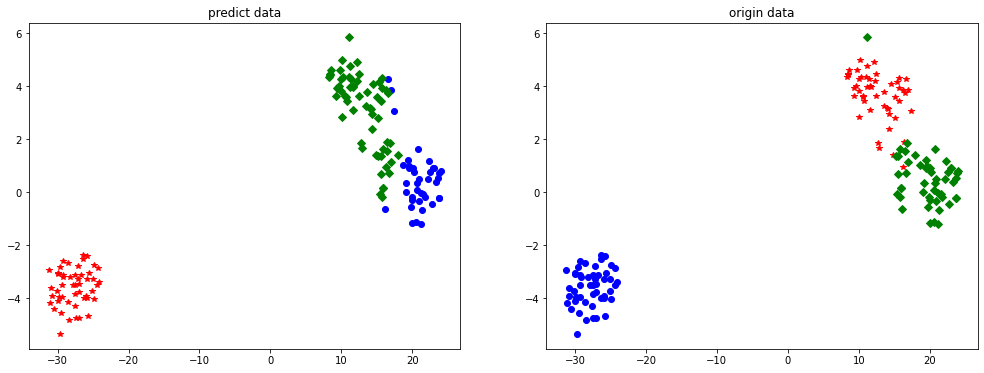

Caliniski-Harabaz score : 557.768920849239
轮廓系数 score: 0.5495805406956187


In [90]:
# random_state 表示随机数生成器的种子
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,max_iter=10,random_state=123).fit(iris_datascale)
#简答打印结果
r1=pd.Series(kmeans.labels_).value_counts()
r2=pd.DataFrame(kmeans.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(iris_names)+[u'类别数目']
# print(r)
#详细输出原结果
# r_new=pd.concat([pd.DataFrame(iris_data),pd.Series(kmeans.labels_)],axis=1)
# r_new.columns=list(iris_names)+[u'类别数目']
# print(kmeans.labels_)
dataset = iris_dataset.copy()
dataset['labels'] = kmeans.labels_
# print(iris_dataset)
draw_result(dataset)
metrics_result(dataset)

# FeatureAgglomeration

In [81]:
from sklearn.cluster import FeatureAgglomeration
# 对特征进行转换，不是分类 可以细看一下, 分类后可做为特征向量
"""
The FeatureAgglomeration uses agglomerative clustering to group together features that look very similar, thus decreasing 
the number of features. It is a dimensionality reduction tool, see Unsupervised dimensionality reduction.
"""
# http://www.itongji.cn/detail?type=1076 层次分类说明
# Ward：minimizes所有聚类中的平方差和，它是一种方差最小化方法，在这个意义上类似于kmeans。
# linkage：链接标准，即样本点的合并标准，主要有ward、complete、average三个参数可选，默认是ward。每个簇（类）本身就是一个集
# 合，我们在合并两个簇的时候其实是在合并两个集合，所以我们需要找到一种计算两个集合之间距离的方式，主要有这三种方式：ward、
# complete、average，分别表示使用两个集合方差、两个集合中点与点距离之间的平均值、两个集合中距离最小的两个点的距离。
# https://blog.csdn.net/zcmlimi/article/details/87929070
# print(iris_datascale)
agglo = FeatureAgglomeration(n_clusters=2).fit_transform(iris_datascale)
# print(agglo)


# AgglomerativeClustering

150
{0, 1}
150


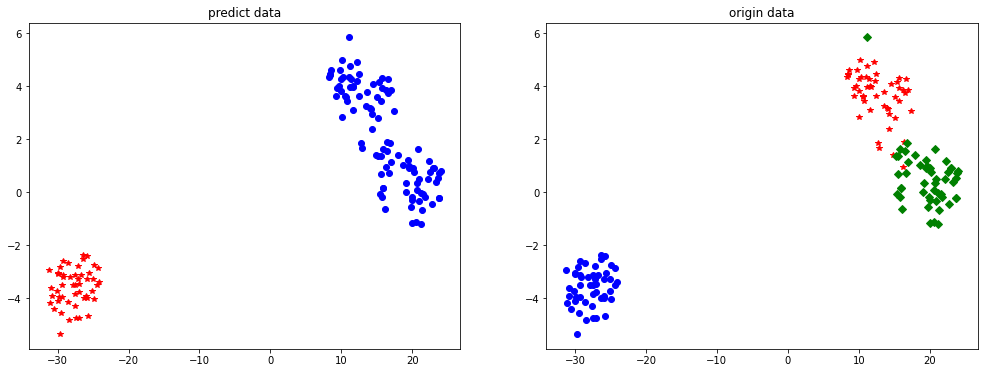

Caliniski-Harabaz score : 502.82156350235897
轮廓系数 score: 0.6867350732769776


In [116]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold    data embeding
# https://stackoverflow.com/questions/53849107/sklearn-agglomerative-clustering-custom-affinity  可采用jarcad方式估计
# https://blog.csdn.net/u011292816/article/details/97866503  展示
# http://www.bubuko.com/infodetail-3719546.html  展示
# http://www.itongji.cn/detail?type=1076 层次分类说明
# https://blog.csdn.net/Andy_shenzl/article/details/83783469 
# Ward：minimizes所有聚类中的平方差和，它是一种方差最小化方法，在这个意义上类似于kmeans。
# linkage：链接标准，即样本点的合并标准，主要有ward、complete、average三个参数可选，默认是ward。每个簇（类）本身就是一个集
# 合，我们在合并两个簇的时候其实是在合并两个集合，所以我们需要找到一种计算两个集合之间距离的方式，主要有这三种方式：ward、
# complete、average，分别表示使用两个集合方差、两个集合中点与点距离之间的平均值、两个集合中距离最小的两个点的距离。
# https://blog.csdn.net/zcmlimi/article/details/87929070
# https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering !!!!

# agglo = AgglomerativeClustering(n_clusters=3).fit(iris_datascale)
# agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='average').fit(iris_datascale)
# https://blog.csdn.net/pentiumCM/article/details/105695414 precomputed , 通过该种方式可设置jarcad距离
agglo = AgglomerativeClustering(n_clusters=None,distance_threshold=0.6,affinity='euclidean',linkage='average').fit(iris_datascale)
print(len(agglo.labels_))
print(set(agglo.labels_))
# print('children :', np.array(agglo.children_).shape)
dataset = iris_dataset.copy()
print(len(dataset))
dataset['labels'] = agglo.labels_
draw_result(dataset)
metrics_result(dataset)